In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("adani.csv")
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,18-06-2018,BE,30.00,31.50,28.50,151.45,31.50,31.50,30.09,31.50,28.5,7006229,2.108440e+08,5272
1,19-06-2018,BE,32.70,33.05,31.00,31.50,33.05,32.60,32.55,33.05,28.5,2895692,9.426390e+07,4070
2,20-06-2018,BE,31.50,32.20,31.00,32.60,31.00,31.00,31.04,33.05,28.5,1115553,3.462806e+07,2897
3,21-06-2018,BE,29.45,30.00,29.45,31.00,29.45,29.65,29.61,33.05,28.5,2854524,8.452398e+07,2941
4,22-06-2018,BE,28.20,29.80,28.20,29.65,29.80,29.45,28.94,33.05,28.2,1612972,4.668530e+07,2846


In [ ]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP =  df['close ']   
    data = TP
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [ ]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df = bollinger_bands(df, 20, 2)


In [ ]:
def add_signal(df):
    # adds two columns to dataframe with buy and sell signals
    buy_list = []
    sell_list = []
    
    for i in range(len(df['close '])):
        if df['HIGH '][i] > df['BU'][i]:             # sell signal     weekly
            buy_list.append(np.nan)
            sell_list.append(df['close '][i])
        elif df['LOW '][i] < df['BL'][i]:            # buy signal      weekly
            buy_list.append(df['close '][i])
            sell_list.append(np.nan)  
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
         
    buy_list = pd.Series(buy_list, name='Buy')
    sell_list = pd.Series(sell_list, name='Sell')
        
    df = df.join(buy_list)
    df = df.join(sell_list)        
     
    return df

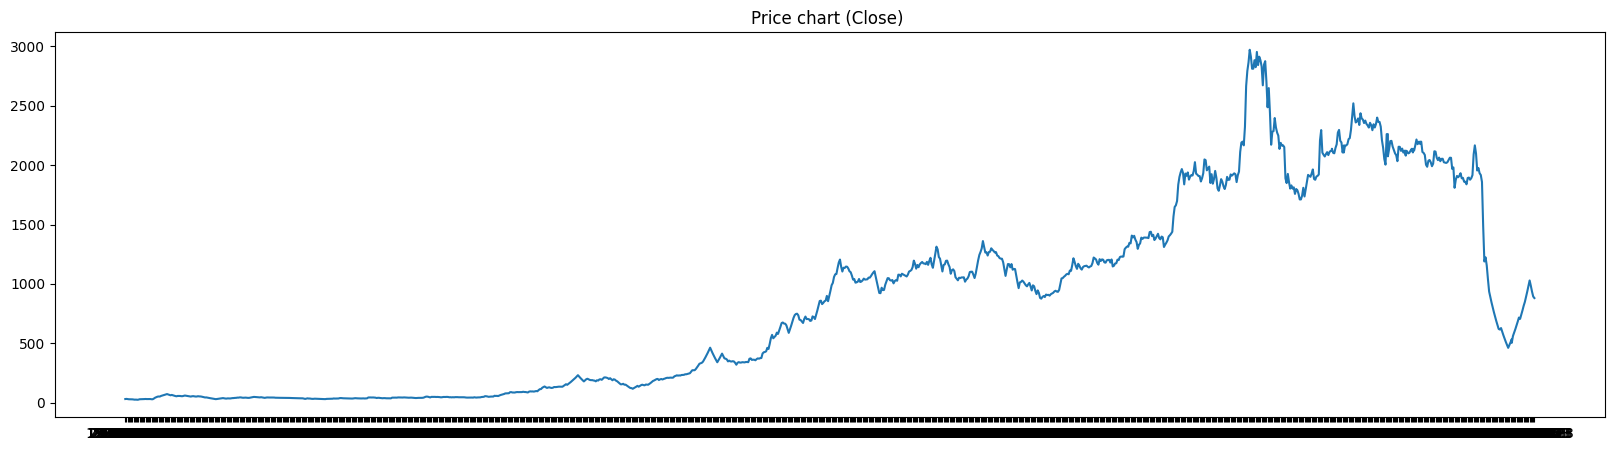

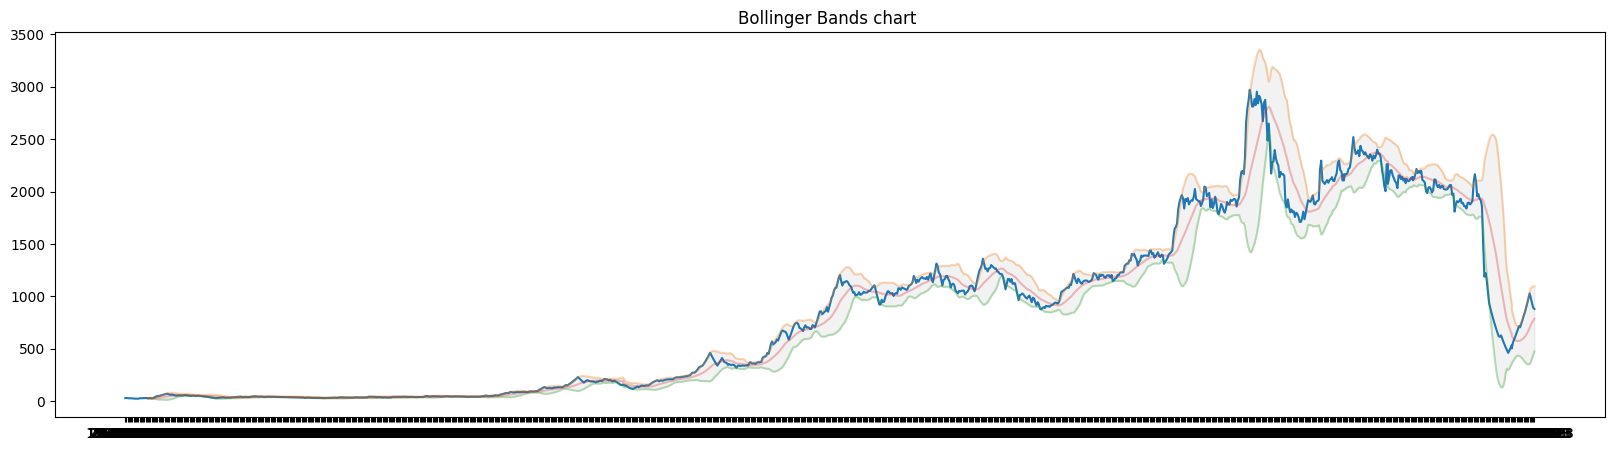

In [ ]:
# plot price
plt.figure(figsize=(20,5))
plt.plot(df['Date '], df['close '])
plt.title('Price chart (Close) ')
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(20,5))
plt.title('Bollinger Bands chart ')
plt.plot(df['Date '], df['close '])
plt.plot(df['Date '], df['BU'], alpha=0.3)
plt.plot(df['Date '], df['BL'], alpha=0.3)
plt.plot(df['Date '], df['B_MA'], alpha=0.3)
plt.fill_between(df['Date '], df['BU'], df['BL'], color='grey', alpha=0.1)

plt.show()

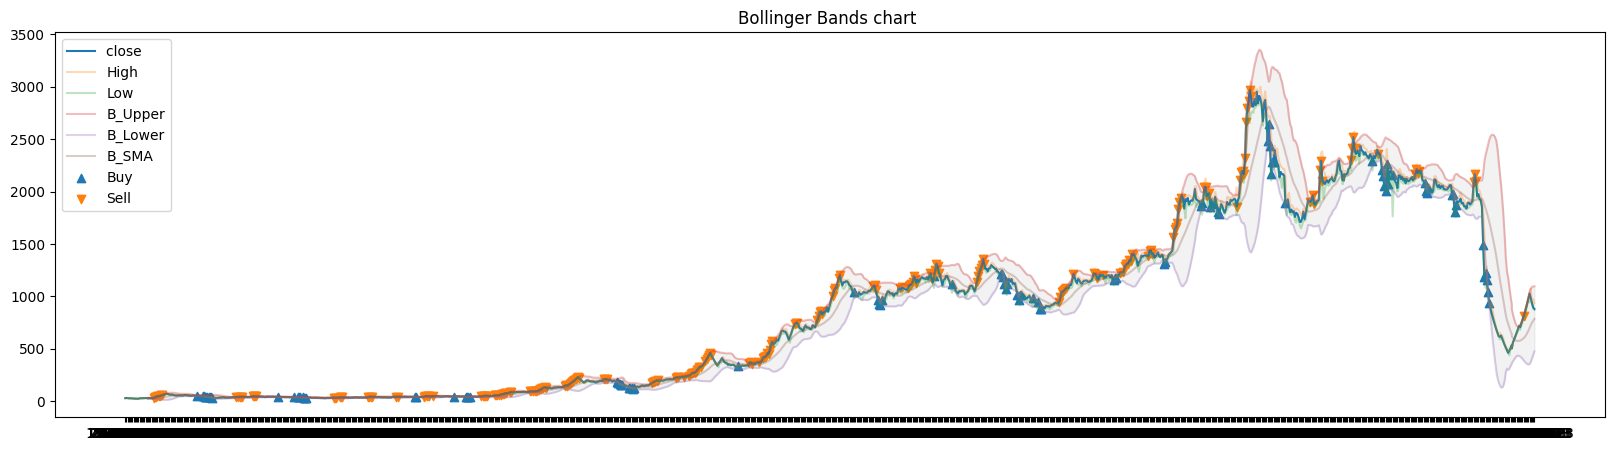

In [ ]:


    # plot  values and significant levels
    plt.figure(figsize=(20,5))
    plt.title('Bollinger Bands chart ')
    plt.plot(df['Date '], df['close '], label='close ')

    plt.plot(df['Date '], df['HIGH '], label='High', alpha=0.3)
    plt.plot(df['Date '], df['LOW ' ], label='Low', alpha=0.3)

    plt.plot(df['Date '], df['BU'], label='B_Upper', alpha=0.3)
    plt.plot(df['Date '], df['BL'], label='B_Lower', alpha=0.3)
    plt.plot(df['Date '], df['B_MA'], label='B_SMA', alpha=0.3)
    plt.fill_between(df['Date '], df['BU'], df['BL'], color='grey', alpha=0.1)

    plt.scatter(df['Date '], df['Buy'], label='Buy', marker='^')
    plt.scatter(df['Date '], df['Sell'], label='Sell', marker='v')

    plt.legend()
    plt.show()